<a href="https://colab.research.google.com/github/nsthomp5/MAT422/blob/main/MAT_422_HW_3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Name: Nicholas Thompson
# ID: 1223100502
# Class: MAT 422
# Assignment: HW 3.7

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot
import torch
import sklearn
from sklearn.metrics import log_loss

This section starts from the ground up to build the foundation for neural networks. 3.7.1 discusses broadly the idea of mathematical formulations. Provided is an example with the formula of the area of a circle as a function definition. Function definitions are important to be able to call later in the process of constructing an Artificial Neural Network (ANN).

The area of a circle with radius 5 is 78.53981633974483
The area of a circle with radius 3 is 28.274333882308138


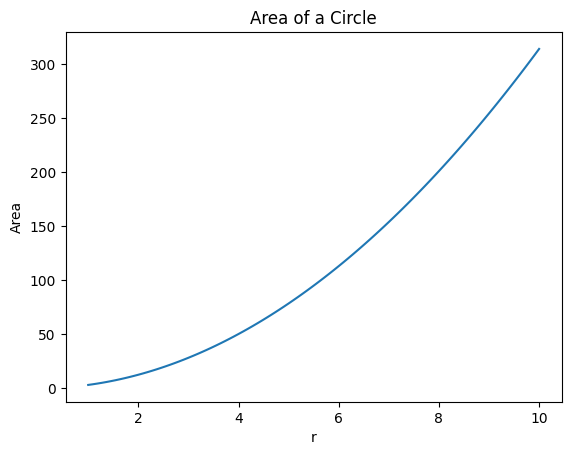

In [39]:
# 3.7.1 Mathematical Formulation
# Example 1: Area of a Circle

def area_circle(r): # function definition
    return np.pi * r**2

r = 5
area = area_circle(r) # output
print("The area of a circle with radius", r, "is", area)

r = 3
area = area_circle(r) # output
print("The area of a circle with radius", r, "is", area)

r = np.linspace(1, 10, 100) # for graphing
area = area_circle(r)

plt.plot(r, area)
plt.xlabel('r')
plt.ylabel('Area')
plt.title('Area of a Circle')
plt.show()

3.7.2 discusses activation functions, which provide the output of a node of an ANN. Each node describes a layer of learning, where the model weights are passed through the activation function and updated according to minimizing the loss function. The sigmoid function is a common activation function used in gradient descent, discussed previously as an algorithm that minimizes the loss function by finding a local minimum for the loss represented as a surface. Part of picking an activation function is being able to find its derivative easily, which is accomplished by the sigmoid function.

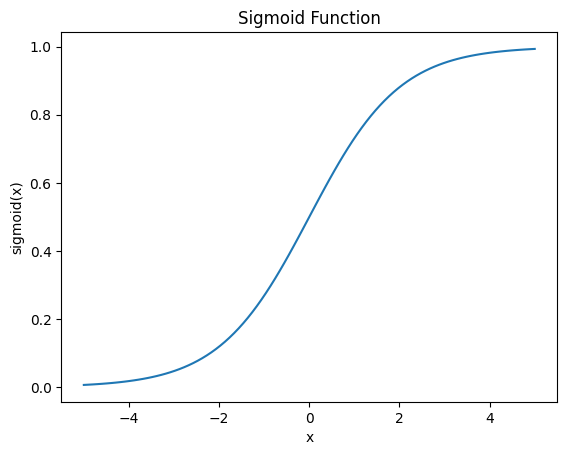

In [40]:
# 3.7.2 Activation Functions
# Example 1: Sigmoid Function

def sigmoid(x): # sigmoid function
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 100) # for graphing
y = sigmoid(x) # takes array input

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()

3.7.3 discusses the cost function, also known as an error function, which determines the error between the outputs of a model and the actual observed labels or values. The provided examples showcase different cost functions. Cost functions based on squares will penalize predicted values far off from the actual values more. Hinge loss is used often in classification problems with support vector machines where uncertain predictions are penalized in addition to incorrect ones.

In [41]:
# 3.7.3 Cost Function
# Example 1: Mean Absolute Error

y_pred = np.array([1, 2, 3, 4, 5])
y_true = np.array([1.5, 2.2, 3, 5, 6.4])

mae = 1 / len(y_pred) * np.sum(np.abs(y_pred - y_true)) # mean absolute error formula

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.6200000000000001


In [42]:
# Example 2: Mean Squared Error

mse = 1 / len(y_pred) * np.sum((y_pred - y_true)**2) # mean squared error formula

print("Mean Squared Error:", mse)

Mean Squared Error: 0.6500000000000002


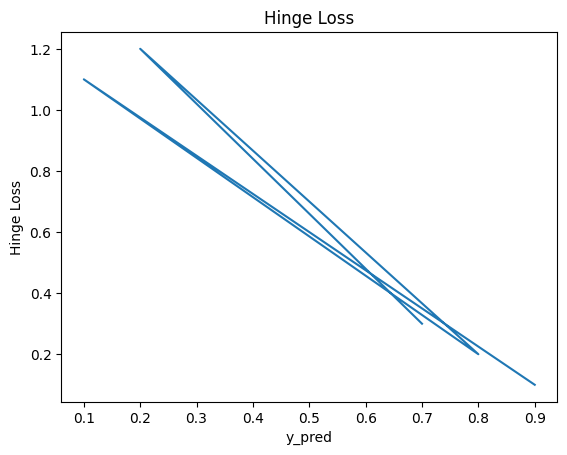

In [43]:
# Example 3: Hinge Loss

y_true = np.array([1, -1, 1, -1, 1])
y_pred = np.array([0.9, 0.1, 0.8, 0.2, 0.7])

hl = np.maximum(0, 1 - y_true * y_pred) # hinge loss formula

plt.plot(y_pred, hl)
plt.xlabel('y_pred')
plt.ylabel('Hinge Loss')
plt.title('Hinge Loss')
plt.show()

3.7.4 discusses backpropagation, which uses gradient descent to estimate the minimum of a loss function by taking steps according to the negative of the loss function's gradient inputted with model weights. The goal is to find the local minimum, where the gradient of the loss function becomes 0 so the algorithm takes no further steps. The purpose of finding the local minimum this way is to reduce computational cost while preserving model accuracy.

In [44]:
# 3.7.4 Backpropagation
# Example 1: Sigmoid Derivative

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # 2-feature inputs
y = np.array([[0], [1], [1], [0]])
y_pred = np.array([[0.1], [0.7], [0.9], [0.3]])

w1 = np.random.randn(2, 2) # regression weight
b1 = np.random.randn(1, 2) # y = w*X + b
w2 = np.random.randn(2, 1)
b2 = np.random.randn(1, 1)



def SigmoidDerivative(x): # partial derivative of sigmoid function, found by hand
    return (1 / (1 + np.exp(-x))) * (1 - (1 / (1 + np.exp(-x))))

def LogLossDerivative(y_true, y_pred): # partial derivative of log-loss function, found by hand
    return -y_true / y_pred + (1 - y_true) / (1 - y_pred)

dl_jk = LogLossDerivative(y, y_pred) # derivative of cross entropy loss with output error checked
da_jk = SigmoidDerivative(x) # derivative of sigmoid function activating inputs
dz_jk = y_pred # derivative of hidden layer inputs before activation
gradient_jk = np.dot(dz_jk.T, dl_jk * da_jk) # gradient found using dot products
print(gradient_jk)

[[-0.3345719 -0.3345719]]


3.7.5 discusses backpropagation algorithms. Gradient descent is an example of this. The package PyTorch provides an intuitive way to do backpropagation using tensors and its backward function, which automatically calculates the gradient when going backwards in an ANN. Tensors are PyTorch's version of arrays, but are built specifically with deep learning in mind, where the gradient is required as an input.

In [45]:
# 3.7.5 Backpropagation Algorithm
# Example 1: PyTorch Backpropagation

x = torch.tensor([[2], [3]], dtype = torch.float32, requires_grad = True) # tensors require gradient to be preserved for backpropagation
y = torch.tensor([[1], [2]], dtype = torch.float32, requires_grad = True)
w = torch.tensor([[3], [1]], dtype = torch.float32, requires_grad = True)
b = torch.tensor([[1], [5]], dtype = torch.float32, requires_grad = True)

y = w * x + b

loss = torch.mean((y - 2)**2)
loss.backward() # backpropagation from loss function
print(x.grad)




tensor([[15.],
        [ 6.]])
